In [1]:
# importing all libraries 
import pandas as pd
import matplotlib.pyplot as plt
import folium
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# explorng the data
df = pd.read_csv("/config/workspace/Dataset/uber-raw-data-sep14.csv")
df.shape


(1028136, 4)

we can see that there are total 829,275 observations and four columns.

In [3]:
df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
dmy = df.copy()

In [9]:
dmy['Date/Time'] = dmy['Date/Time'].map(pd.to_datetime) 
print(dmy.tail())

KeyboardInterrupt: 

In [6]:
#getting date of month
def getDateOfMonth(dt):
  return dt.day
dmy['day'] = dmy['Date/Time'].map(getDateOfMonth)

def getWeekDay(dt):
  return dt.weekday()
dmy['weekday'] = dmy['Date/Time'].map(getWeekDay)  

def getHour(dt):
  return dt.hour
dmy['hour'] = dmy['Date/Time'].map(getHour)  


AttributeError: 'str' object has no attribute 'day'

In [7]:
print(dmy.tail())

                  Date/Time      Lat      Lon    Base
1028131  9/30/2014 22:57:00  40.7668 -73.9845  B02764
1028132  9/30/2014 22:57:00  40.6911 -74.1773  B02764
1028133  9/30/2014 22:58:00  40.8519 -73.9319  B02764
1028134  9/30/2014 22:58:00  40.7081 -74.0066  B02764
1028135  9/30/2014 22:58:00  40.7140 -73.9496  B02764


In [8]:
# Analyzing by date in the data
plt.hist(dmy.day,bins=30,range=(0.5,30.5) ,rwidth=.9)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Date of Month');

AttributeError: 'DataFrame' object has no attribute 'day'

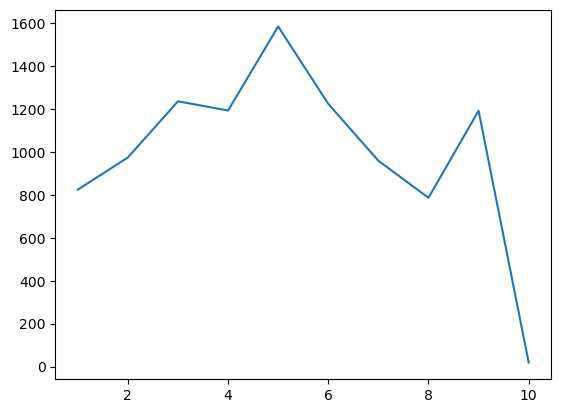

In [ ]:
# counting number of rows. ie getting number of records per day.
# visualizing using another chart
def countRow(row):
  return len(row)
orderByDate = dmy.groupby('day').apply(countRow)  
# print(orderByDate)
plt.plot(orderByDate)

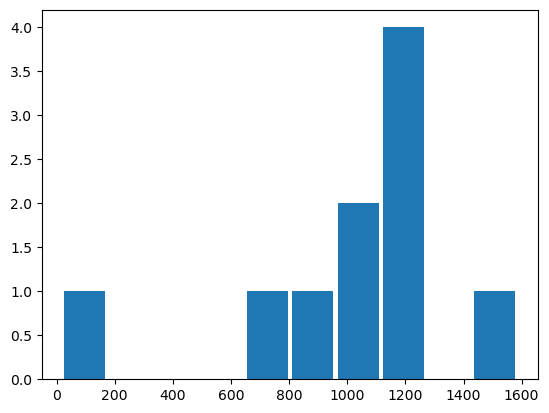

In [ ]:
orderByDateSorted = orderByDate.sort_values()
# plt.hist(range(1,31),orderByDateSorted)
# print(orderByDateSorted)
plt.hist(orderByDateSorted,rwidth=.9);


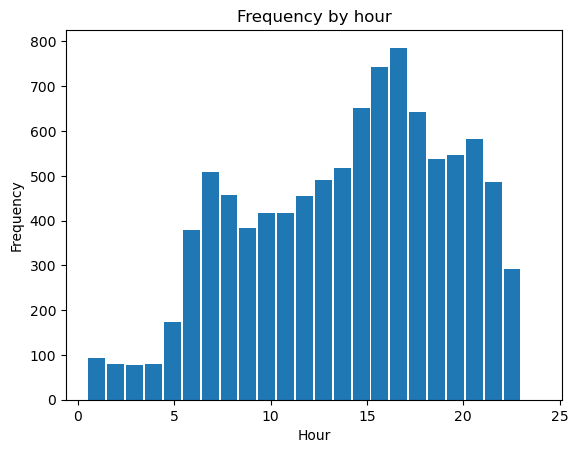

In [ ]:
# Analyzing by hour in the data
plt.hist(dmy.hour,bins=24,range=(0.5,24) ,rwidth=.9)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency by hour');

Text(0.5, 1.0, 'Frequency by Day')

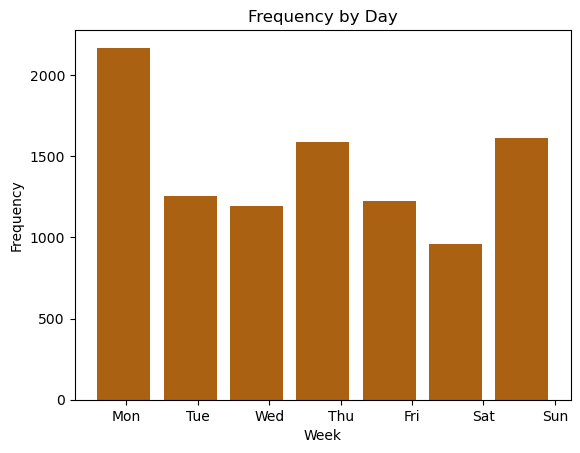

In [ ]:
# Analyzing by week in the data
plt.hist(dmy.weekday,bins=7,range=(-0.5,6),rwidth=.8 ,color="#AA6112")
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.title('Frequency by Day')

<AxesSubplot: xlabel='hour', ylabel='weekday'>

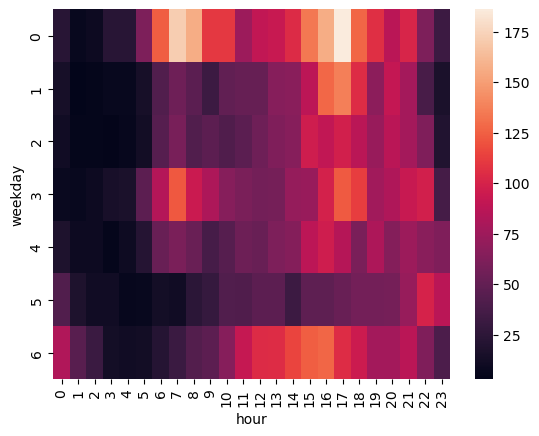

In [ ]:
# analyzing hour and day together using seaborn
import seaborn as sns
tog = dmy.groupby('weekday hour'.split()).apply(countRow).unstack()
sns.heatmap(tog)

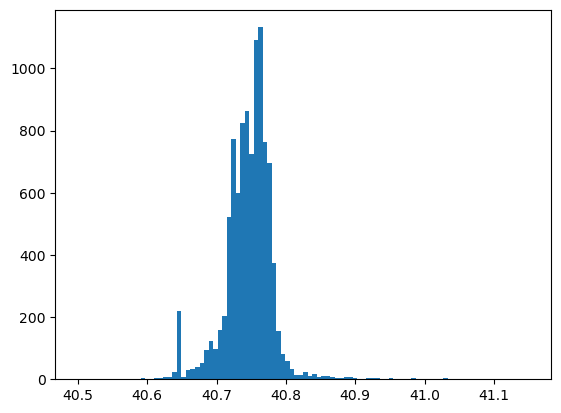

In [ ]:
# analyzing the latitude and longitude.
plt.hist(dmy['Lat'],bins=100,range=(40.5,41.15));


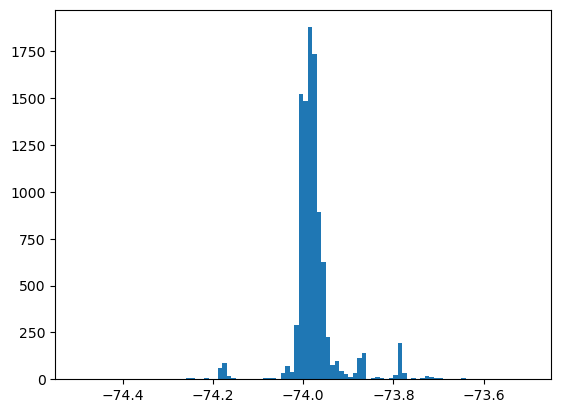

In [ ]:
plt.hist(dmy['Lon'],bins=100,range=(-74.5,-73.5));

''

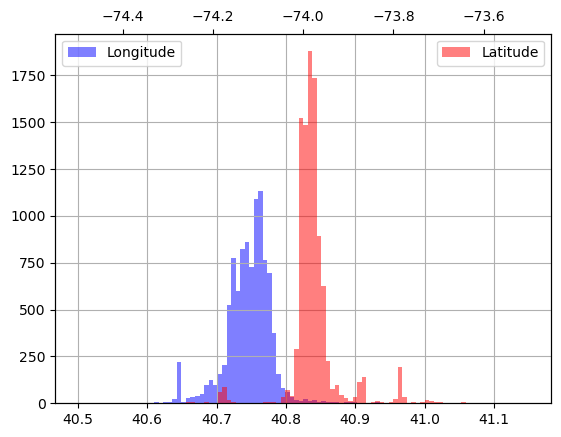

In [ ]:
# Now analyzing them together
plt.hist(dmy['Lat'],bins=100,range=(40.5,41.15),color='b',alpha=.5,label='Longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(dmy['Lon'],bins=100,range=(-74.5,-73.5),color='r',alpha=.5,label='Latitude')
plt.legend(loc='upper right')
;

(40.5, 41.15)

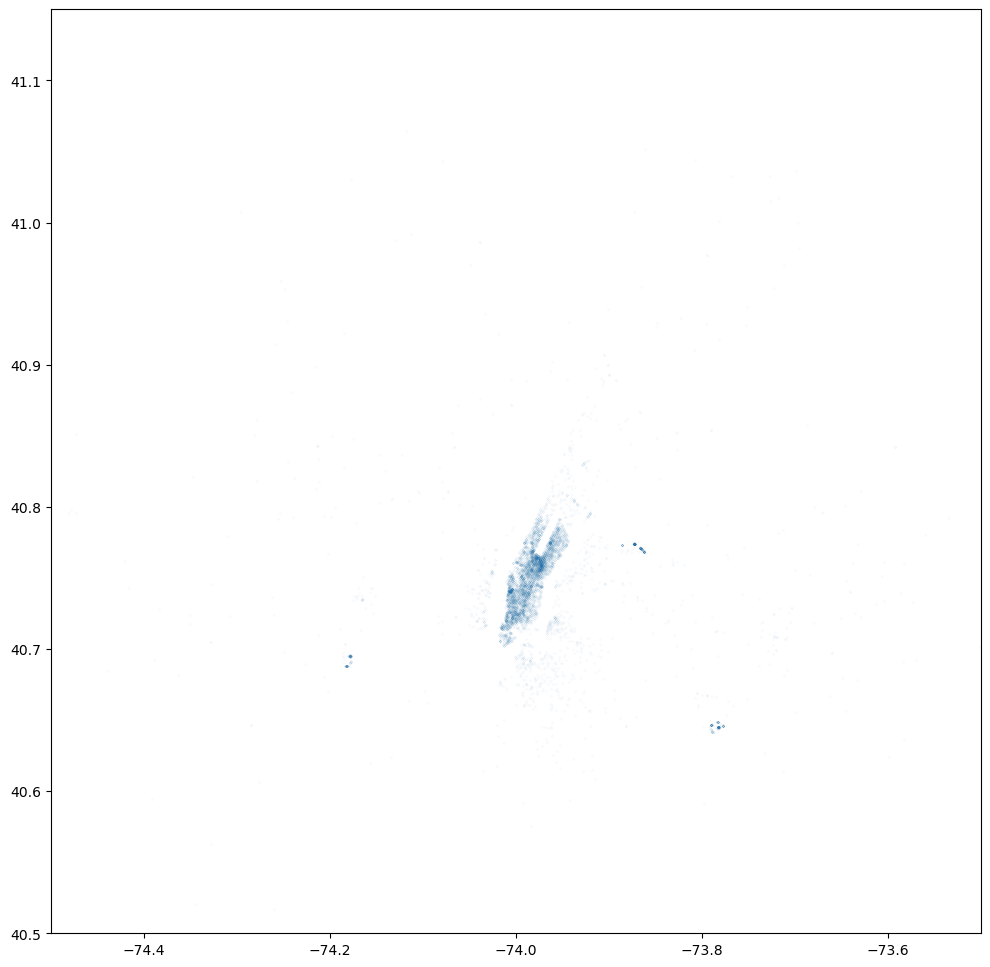

In [ ]:
# another way of visualizing the latitude and longitude 
plt.figure(figsize=(12,12))
plt.plot(dmy['Lon'],dmy['Lat'],'.',ms=.1,alpha=.5)
plt.xlim(-74.5,-73.5)
plt.ylim(40.5,41.15)

From the chart we can see better visualization of NYC neighborhoods. There is Manhattan area and some people go to NJ.  

In [ ]:
# making a copy
df1 = df.copy()

In [ ]:
# selecting features
dfClusters =  df1[['Lat','Lon']]
print(dfClusters.dtypes)

Lat    float64
Lon    float64
dtype: object


In [ ]:
print(dfClusters.head(4))

       Lat      Lon
0  40.7293 -73.9920
1  40.7131 -74.0097
2  40.3461 -74.6610
3  40.7555 -73.9833


To use k-means clustering first need to find out k value. So below is the elbow plot.

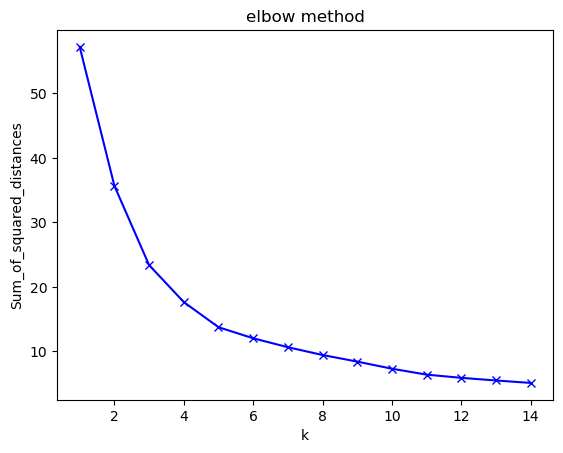

In [ ]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,max_iter=300,random_state=12345)
    km = km.fit(dfClusters)
    Sum_of_squared_distances.append(km.inertia_)

# to find optimal k
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('elbow method')
plt.show()


In [ ]:
!pip install kneed 
from kneed import KneeLocator
k1=KneeLocator(range(1,15),Sum_of_squared_distances ,curve='convex',direction='decreasing')
k1.elbow

4

If we observe the chart properly then we can see that as the sum of squared distance decreases with the number of clusters increases.



In [ ]:
# assigning a number of cluster in K means algorithm.
kmeans=KMeans(n_clusters=7,max_iter=300,random_state=45)
kmeans.fit(dfClusters)
labels=kmeans.labels_
dfClusters['clusters'] = labels

In [ ]:
print(dfClusters.head(10))

       Lat      Lon  clusters
0  40.7293 -73.9920         2
1  40.7131 -74.0097         2
2  40.3461 -74.6610         3
3  40.7555 -73.9833         0
4  40.6880 -74.1831         3
5  40.7152 -73.9917         2
6  40.7282 -73.9910         2
7  40.3042 -73.9794         1
8  40.7270 -73.9915         2
9  40.7221 -73.9965         2


In [ ]:
# storing cluster centroids
cent = kmeans.cluster_centers_
print(cent)

newFrame = pd.DataFrame(cent)
newFrame.columns=['Lat','Lon']
print(newFrame)

[[ 40.76738112 -73.97275276]
 [ 40.68729016 -73.9653065 ]
 [ 40.73278657 -73.99952837]
 [ 40.71756901 -74.20922521]
 [ 40.65783579 -73.77636421]
 [ 40.79651273 -73.62007091]
 [ 40.789898   -73.87936267]]
         Lat        Lon
0  40.767381 -73.972753
1  40.687290 -73.965306
2  40.732787 -73.999528
3  40.717569 -74.209225
4  40.657836 -73.776364
5  40.796513 -73.620071
6  40.789898 -73.879363


We can see that there are 7 centroids from the output. For eg 40.767(latitude) and -73.971(longitude) is the centroid for cluster 1 and so on.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dfClusters)
    score=silhouette_score(dfClusters,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[0.774740334336761,
 0.8727968378368703,
 0.8873830226486126,
 0.9489699642523675,
 0.9650995754046486,
 0.9720153544880961,
 0.966120000974415,
 0.7442220255339803,
 0.7284376787178389]

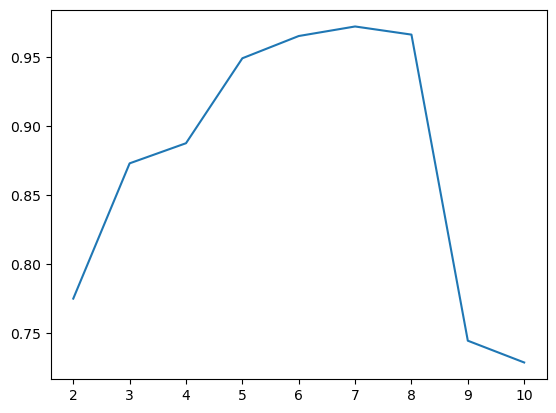

In [ ]:
plt.plot(range(2,11),silhouette_coefficients)

Using alternate clustering algorithms

Hierarchial cluserting

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dfClusters_scaled=scaler.fit(dfClusters)

In [ ]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(dfClusters,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

Text(0, 0.5, 'Eucledian Distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(dfClusters)

In [ ]:
df11=pd.DataFrame(dfClusters,columns=(['Lat','Lon']))
plt.scatter(df11['Lon'],df11['Lat'],c=cluster.labels_)

In [ ]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(dfClusters)
    score = silhouette_score(dfClusters, agglo.labels_)
    silhouette_coefficients.append(score)

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

We can observe that all the 7 centroids have been marked on the map.

We can observe the scatter plot and the google map chart but the chart using folium shows better visualization of the latitude and longitude.

In [ ]:
# predicting another location
anotherLocation1 = [(40.7332,-74.2342)]
kmeans.predict(anotherLocation1)

So the new latitude and longitude value 40.7332,-74.2342 should be assigned to the cluster 2 . This will be as distance from the centroid of cluster 2 is minimum. So the uber ride will come closer to cluster 2.